In [100]:
import os
import sys
from os import listdir
from os.path import isfile, isdir, join
import pandas as pd

dataframes = []
for dir1 in os.listdir('C:/Users/Usurio/Desktop/kronio'):
    if dir1.startswith('data'):
        for i in os.listdir('C:/Users/Usurio/Desktop/kronio'+'/'+ dir1):
            if i.endswith('.csv'):
                path = 'C:/Users/Usurio/Desktop/kronio'+'/'+ dir1+'/'+i
                data2 = pd.read_csv(path,error_bad_lines=False, engine="python")
                dataframes.append(data2)

Skipping line 2: ',' expected after '"'
Skipping line 3: ',' expected after '"'
Skipping line 4: ',' expected after '"'
Skipping line 5: ',' expected after '"'
Skipping line 7: ',' expected after '"'
Skipping line 8: ',' expected after '"'
Skipping line 9: ',' expected after '"'
Skipping line 10: ',' expected after '"'
Skipping line 12: ',' expected after '"'
Skipping line 13: field larger than field limit (131072)
Skipping line 14007: ',' expected after '"'
Skipping line 14008: ',' expected after '"'
Skipping line 14009: ',' expected after '"'
Skipping line 14010: ',' expected after '"'
Skipping line 14011: ',' expected after '"'
Skipping line 14012: ',' expected after '"'
Skipping line 14014: ',' expected after '"'
Skipping line 14015: ',' expected after '"'
Skipping line 14016: ',' expected after '"'
Skipping line 14017: ',' expected after '"'
Skipping line 14018: ',' expected after '"'
Skipping line 14019: ',' expected after '"'
Skipping line 14020: ',' expected after '"'
Skipping 

In [2]:
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
year = int(date.strftime("%Y"))
LastFiveYears = range(int(year-5),int(year)+1)

Punto1 = dataframes[0]
Punto1 = Punto1[Punto1['Unnamed: 0'].isin(LastFiveYears)]
Punto1  = Punto1 .rename(columns={'Unnamed: 0':'Año',
                                   'Unnamed: 1':'Semestre','1.00004215E10':'Profitable',
                                     'Å»yraf: Czas Zemsty':'Movie'})

Punto1

,Año,Semestre,Profitable,Movie
265,2017,1,103311300.0,Bellator 175: Rampage vs. King Mo 2
266,2017,2,666666.7,One Cut of the Dead
267,2018,1,666666.7,Khaltoor
268,2018,2,20750.0,Night Where People Had Died 7: He Return
269,2019,1,3947.1,WWE Money in the Bank 2019
270,2019,2,10000.0,The Loony Park
271,2020,1,16666666.7,Fortnite the Movie Part One
272,2020,2,10000000.0,Fortnite: The Final Chapter
273,2021,1,13383194.5,"Dad, I'm Sorry"
274,2021,2,333333.3,Bear Lake Bloodbath


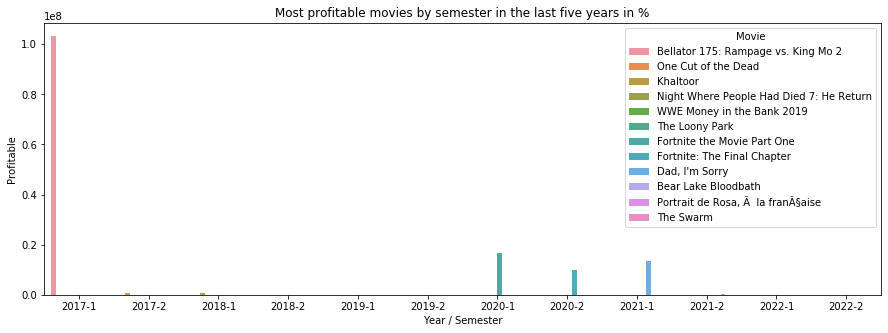

In [3]:
Punto1['Año'] = Punto1['Año'].astype(str)
Punto1['Semestre'] = Punto1['Semestre'].astype(str)
Punto1['Axi'] = Punto1['Año'] +'-' +Punto1['Semestre']
plt.figure(figsize=(15,5))
sns.barplot(data=Punto1, x='Axi',y='Profitable',hue='Movie').set(xlabel='Year / Semester',title='Most profitable movies by semester in the last five years in %')
plt.show()

In [4]:
Punto2 = dataframes[1]
Punto2 = Punto2[Punto2['Unnamed: 0'].isin(LastFiveYears)]
Punto2  = Punto2.rename(columns={'Unnamed: 0':'Año',
                                   '9.0E9':'Profitable','Unnamed: 2':'Genre'})
Punto2

,Año,Profitable,Genre
11172,2017.0,NaN,Action-Adventure
11173,2017.0,NaN,Action-Adventure-Animation-Science Fiction
11174,2017.0,0.0,Action-Adventure-Comedy-Horror-Science Fiction...
11175,2017.0,0.0,Action-Adventure-Comedy-Science Fiction
11176,2017.0,395.1,Action-Adventure-Comedy-Science Fiction-Crime
...,...,...,...
45731,2022.0,0.0,Western-Action-Drama
45732,2022.0,NaN,Western-Action-Thriller
45733,2022.0,0.0,Western-Adventure-Thriller
45734,2022.0,NaN,Western-Horror


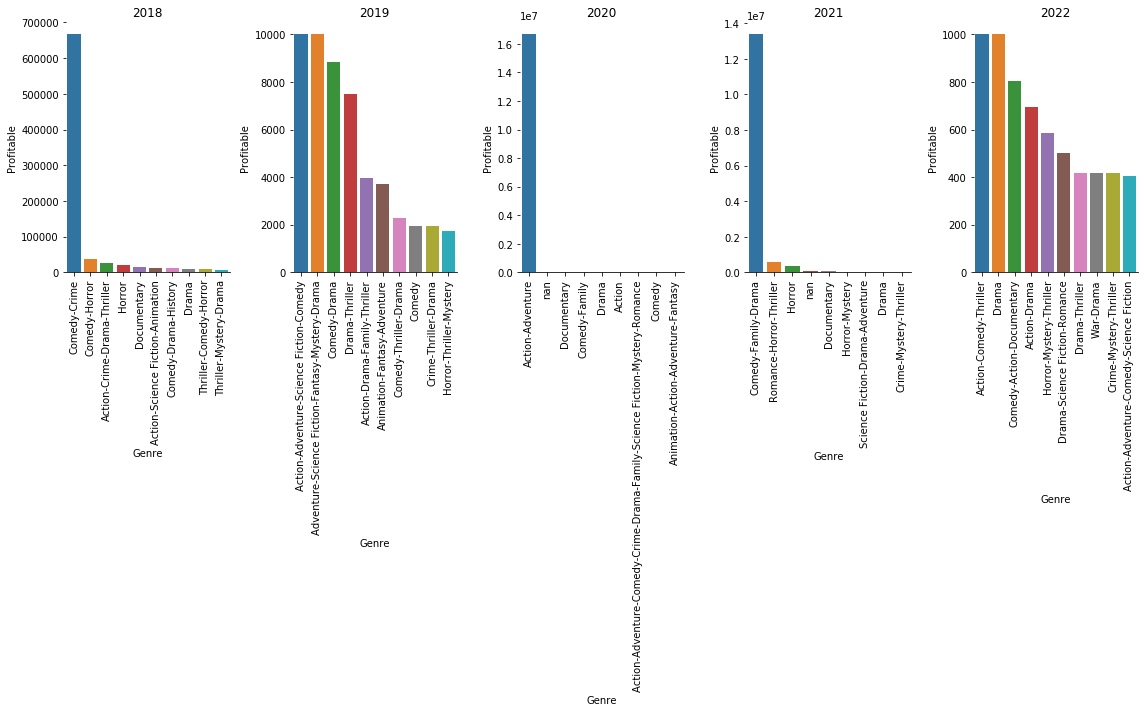

In [125]:
f, axes = plt.subplots(figsize=(16, 10), ncols=5)
sns.despine(left=True)

d1 = Punto2[Punto2['Año']==2018].sort_values('Profitable', ascending=False)[:10]
xlabel = d1['Genre']
d2 = Punto2[Punto2['Año']==2019].sort_values('Profitable', ascending=False)[:10]
xlabel2 = d2['Genre']
d3 = Punto2[Punto2['Año']==2020].sort_values('Profitable', ascending=False)[:10]
xlabel3 = d3['Genre']
d4 = Punto2[Punto2['Año']==2021].sort_values('Profitable', ascending=False)[:10]
xlabel4 = d4['Genre']
d5 = Punto2[Punto2['Año']==2022].sort_values('Profitable', ascending=False)[:10]
xlabel5 = d5['Genre']


g1 = sns.barplot('Genre', 'Profitable', ax=axes[0],data=d1).set(title='2018')
axes[0].set_xticklabels(labels=xlabel, rotation=90)
g2 = sns.barplot('Genre', 'Profitable', ax=axes[1],data=d2).set(title='2019')
axes[1].set_xticklabels(labels= xlabel2, rotation=90)
g2 = sns.barplot('Genre', 'Profitable', ax=axes[2],data=d3).set(title='2020')
axes[2].set_xticklabels(labels= xlabel3, rotation=90)
g2 = sns.barplot('Genre', 'Profitable', ax=axes[3],data=d4).set(title='2021')
axes[3].set_xticklabels(labels= xlabel4, rotation=90)
g2 = sns.barplot('Genre', 'Profitable', ax=axes[4],data=d5).set(title='2022')
axes[4].set_xticklabels(labels= xlabel5, rotation=90)
plt.tight_layout()
plt.show()

In [60]:
Punto3 = dataframes[2]
Punto3= Punto3.T.reset_index().T
Punto3 = Punto3.rename(columns={0:'Movie',
                                   1:'Genre',2:'Profitable',3:'Rank'})
Punto3['Profitable']= Punto3['Profitable'].astype('float64')

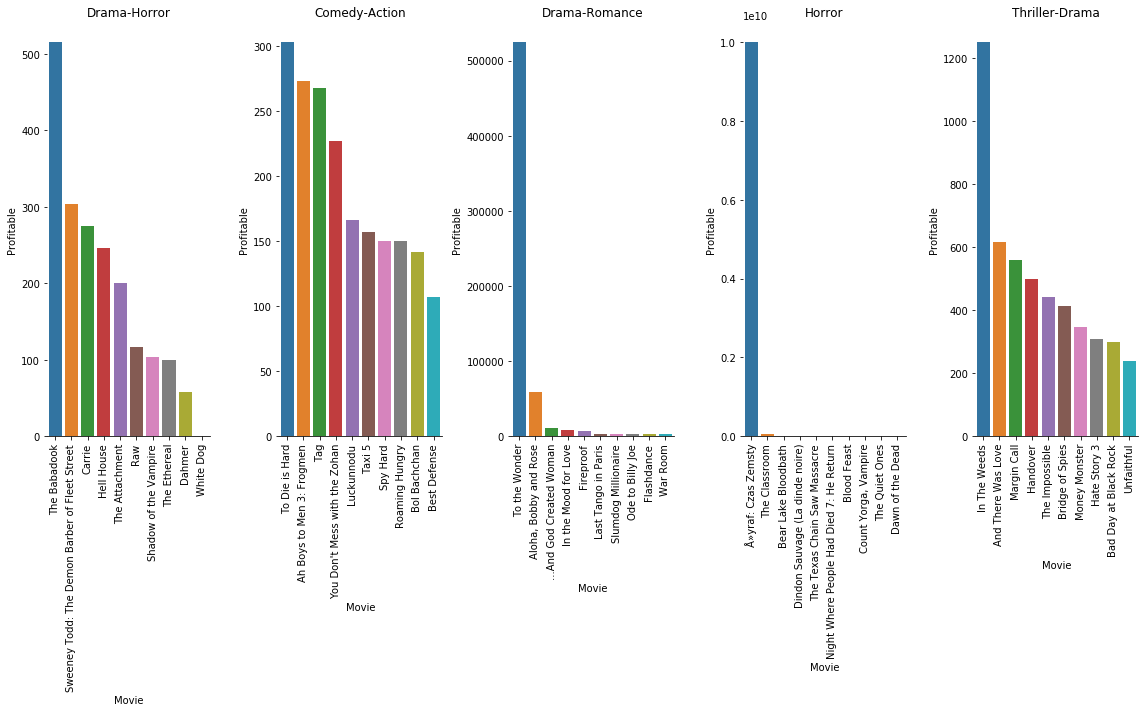

In [103]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

f, axes = plt.subplots(figsize=(16, 10), ncols=5)
sns.despine(left=True)

d1 = Punto3[Punto3['Genre']=='Drama-Horror']
xlabel = d1['Movie']
d2 = Punto3[Punto3['Genre']=='Comedy-Action']
xlabel2 = d2['Movie']
d3 = Punto3[Punto3['Genre']=='Drama-Romance']
xlabel3 = d3['Movie']
d4 = Punto3[Punto3['Genre']=='Horror']
xlabel4 = d4['Movie']
d5 = Punto3[Punto3['Genre']=='Thriller-Drama']
xlabel5 = d5['Movie']


g1 = sns.barplot('Movie', 'Profitable', ax=axes[0],data=Punto3[Punto3['Genre']=='Drama-Horror']).set(title='Drama-Horror')
axes[0].set_xticklabels(labels=xlabel, rotation=90)
g2 = sns.barplot('Movie', 'Profitable', ax=axes[1],data=Punto3[Punto3['Genre']=='Comedy-Action']).set(title='Comedy-Action')
axes[1].set_xticklabels(labels= xlabel2, rotation=90)
g2 = sns.barplot('Movie', 'Profitable', ax=axes[2],data=Punto3[Punto3['Genre']=='Drama-Romance']).set(title='Drama-Romance')
axes[2].set_xticklabels(labels= xlabel3, rotation=90)
g2 = sns.barplot('Movie', 'Profitable', ax=axes[3],data=Punto3[Punto3['Genre']=='Horror']).set(title='Horror')
axes[3].set_xticklabels(labels= xlabel4, rotation=90)
g2 = sns.barplot('Movie', 'Profitable', ax=axes[4],data=Punto3[Punto3['Genre']=='Thriller-Drama']).set(title='Thriller-Drama')
axes[4].set_xticklabels(labels= xlabel5, rotation=90)
plt.tight_layout()
plt.show()

In [18]:
Punto4 = dataframes[3]


Punto4= Punto4.T.reset_index().T
Punto4  = Punto4.rename(columns={0:'Month',
                                   1:'Popularity'})
Punto4  = Punto4.dropna()
Punto4['Popularity']= Punto4['Popularity'].astype('float64')
Punto4['Month']= Punto4['Month'].astype('float64')

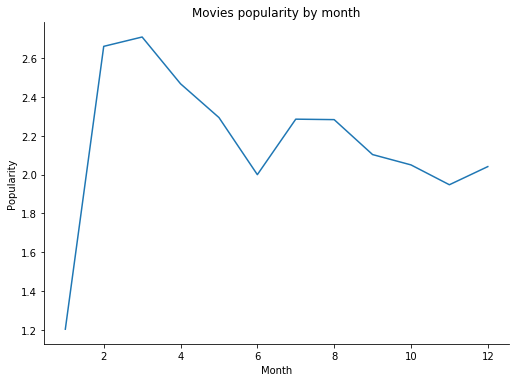

In [52]:
sns.relplot(x = "Month", y = "Popularity", data = Punto4, kind = "line",height=5,aspect=11.7/8.27).set(ylabel='Popularity', xlabel='Month',title='Movies popularity by month')
plt.show()

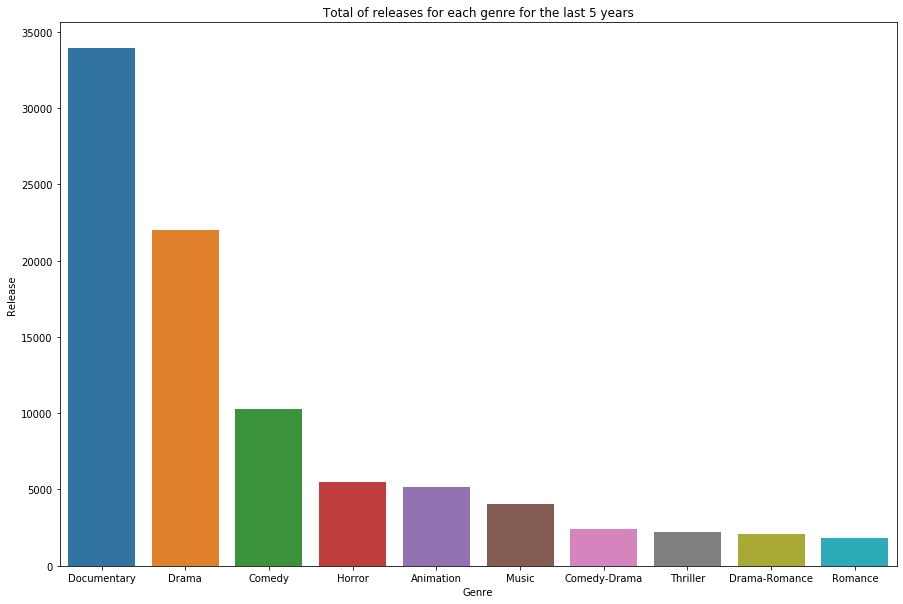

In [44]:
Punto5 = dataframes[4]
Punto5 = Punto5.T.reset_index().T
Punto5 = Punto5.rename(columns={0:'Año',
                                   1:'Genre', 2:'Release'})
Punto5 = Punto5.groupby('Genre')['Release'].sum().reset_index()
Punto5['Release']= Punto5['Release'].astype('int')

plt.figure(figsize=(15,10))
sns.barplot(data=Punto5.sort_values('Release', ascending=False)[:10], x='Genre', y='Release').set(title='Total of releases for each genre for the last 5 years')
plt.show()